<h1 style="font-family: Courier New; font-size: 40px">Nyström Kernel PCA</h1>
<hr>

In this notebook we will go through an example of how to use kernel PCA with the Nyström method. We will load some data, calculate the Nyström PCA solution and compare it to standard kernel PCA, before illustrating the results through some visualization.



<h1 style="font-family: Courier New; font-size: 25px">Data</h1>
<hr>

Let's load the example dataset we will use. We will use some handwritten digits data, where each data dimension is the grayscale values for one pixel. We don't use the target values which contains the actual digit as a number.

For purposes of illustration we only use the first 100 data points.

In [1]:
from sklearn.datasets import load_digits

data = load_digits()

nbr_data_points = 100

X = data['data'][:nbr_data_points]

print(f"\nNumber of data points: \t{ X.shape[0] }")
print(f"Number of features: \t{ X.shape[1] }\n")
print(f"X: \n\n{X}\n\n")



Number of data points: 	100
Number of features: 	64

X: 

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  2. 15. ...  5.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]]




<h1 style="font-family: Courier New; font-size: 25px">Models</h1>
<hr>

Let's run kernel PCA and Nyström kernel PCA on the data and see how much variance the models are capturing with 2 principal components each. We use a Nyström subset of size 10.

In [2]:
from nystrompca import NystromKPCA, KernelPCA

kpca = KernelPCA(n_components=2, sigma=100, scale=False)
kpca.fit_transform(X)

nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, sigma=100, scale=False)
nystrom_kpca.fit_transform(X)


print(f"Kernel PCA variance captured:\t{kpca.explained_variance_.sum():.4f}")

print(f"Nyström KPCA variance captured:\t{nystrom_kpca.explained_variance_.sum():.4f}")

Kernel PCA variance captured:	0.0646
Nyström KPCA variance captured:	0.0487


The Nyström method does quite well, capturing around 80 % of the variance of the full method with a tenth of the data points in the subset, for the first two principal components. 

Note that we get slightly different results for the Nyström method every time we run the model, due to the random sampling of the subset. The same results could be obtained every single time by passing the ``seed`` parameter to the constructor.

<h1 style="font-family: Courier New; font-size: 25px">Plots</h1>
<hr>

Let's plot the weights on the top two principal components.

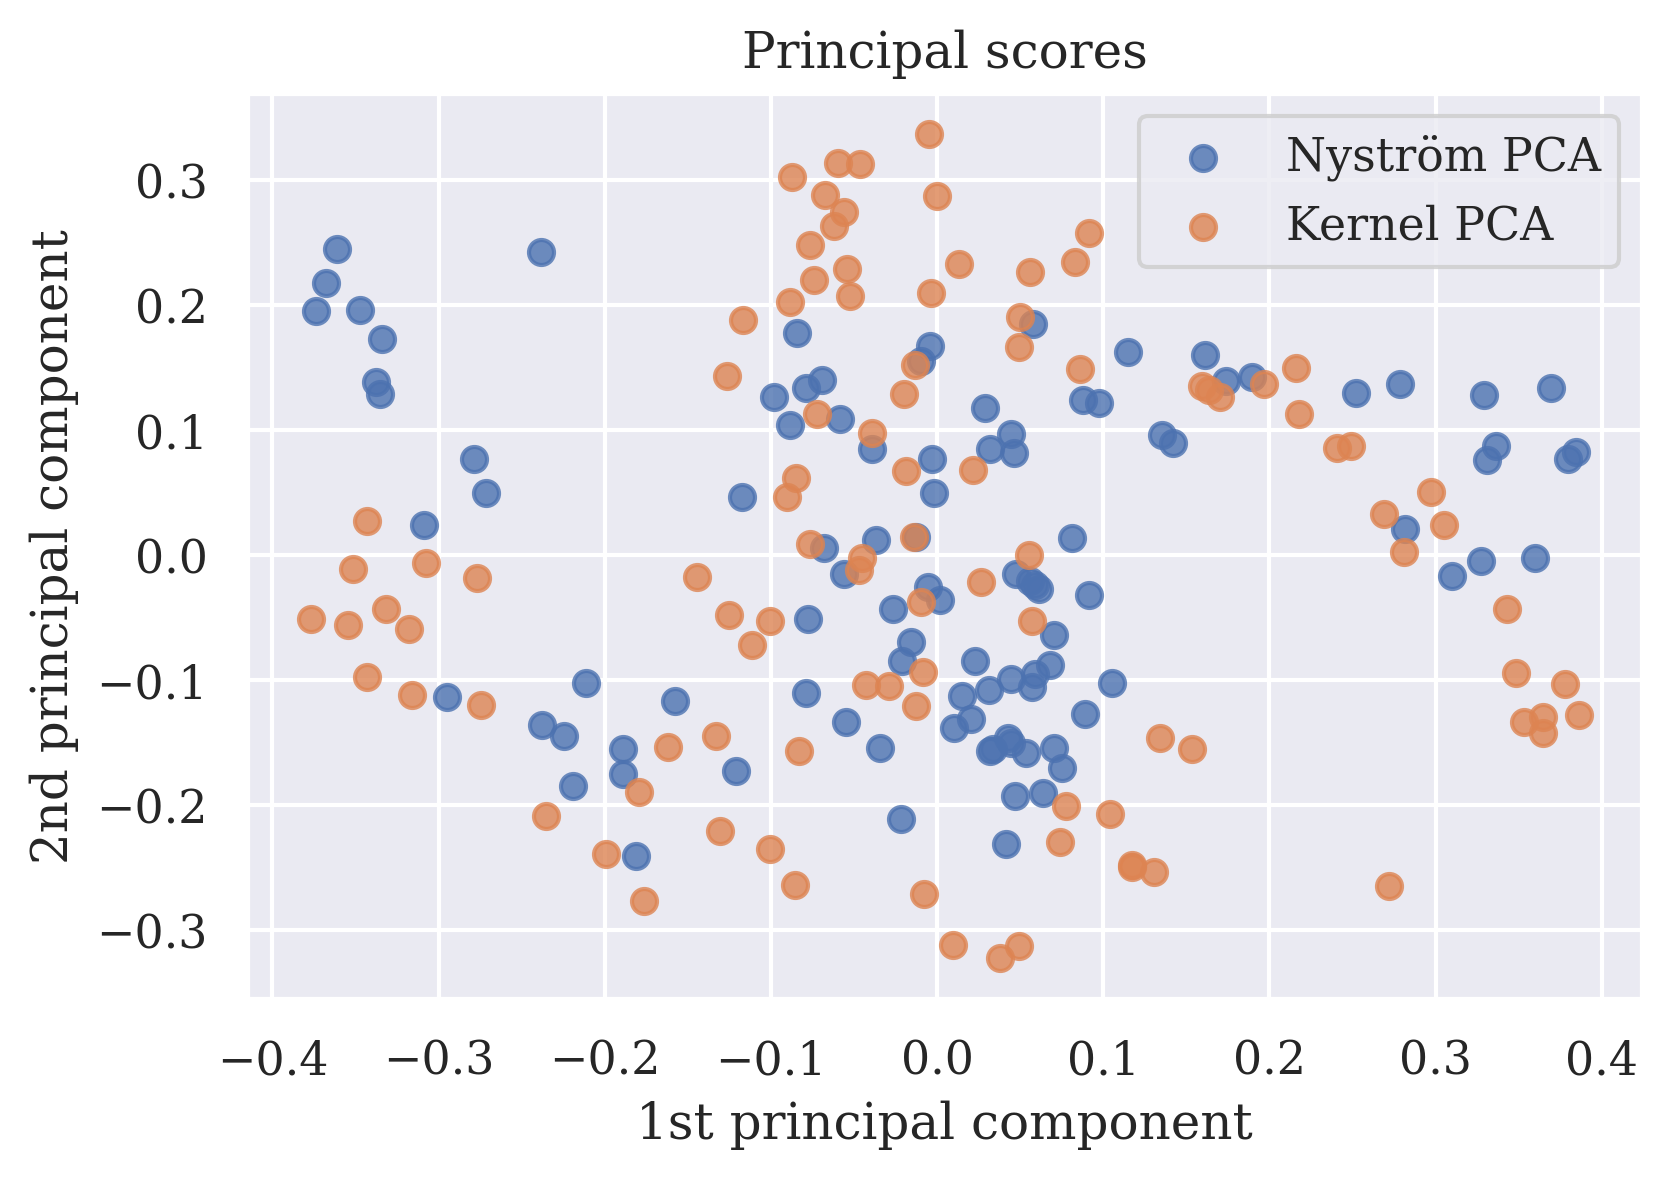

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 35


sns.set_context('paper', font_scale=10)
sns.set(style='darkgrid')
sns.set_style({'font.family': 'serif',
               'font.serif': 'Times New Roman',
               'font.size': 40})

plt.scatter(nystrom_kpca.scores_[:,0], nystrom_kpca.scores_[:,1], alpha=0.8)
plt.scatter(x=kpca.scores_[:,0], y=kpca.scores_[:,1], alpha=0.8)

plt.legend(['Nyström PCA', 'Kernel PCA'])
plt.title('Principal scores')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component');

The weights look similar for both methods, despite Nyström kernel PCA having only a tenth of the parameters of the full method.